<a href="https://colab.research.google.com/github/seo-minsu/Python_Programming_Study/blob/main/pandas_exercises/09_Time_Series/Getting_Financial_Data/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Financial Data - Pandas Datareader

### Introduction:

This time you will get data from a website.


### Step 1. Import the necessary libraries

In [88]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

### Step 2. Create your time range (start and end variables). The start date should be 01/01/2015 and the end should today (whatever your today is).

--> 2015년 1월 1일부터 현재 날짜까지의 날짜 범위 생성

In [89]:
##날짜 범위 생성 함수: pandas.date_range

start_date = '2015-01-01'
end_date = datetime.today()

date_range = pd.date_range(start=start_date, end=end_date)

date_range

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2024-11-24', '2024-11-25', '2024-11-26', '2024-11-27',
               '2024-11-28', '2024-11-29', '2024-11-30', '2024-12-01',
               '2024-12-02', '2024-12-03'],
              dtype='datetime64[ns]', length=3625, freq='D')

### Step 3. Get an API key for one of the APIs that are supported by Pandas Datareader, preferably for AlphaVantage.

--> Pandas Datareader에서 지원하는 API 중 하나에 대한 API 키 가져와라, AlphaVantage API 키 선호

If you do not have an API key for any of the supported APIs, it is easiest to get one for [AlphaVantage](https://www.alphavantage.co/support/#api-key). (Note that the API key is shown directly after the signup. You do *not* receive it via e-mail.)

(For a full list of the APIs that are supported by Pandas Datareader, [see here](https://pydata.github.io/pandas-datareader/readers/index.html). As the APIs are provided by third parties, this list may change.)

--> Pandas datareader에서 사용할 수 있는 API가 여러가지가 있지만 그 중 알파빈티지 API가 가장 간단함. 회원가입 하고 바로 키 복사해서 쓰면 됨

In [90]:
import pandas_datareader.data as web
api_key = 'DV8J848ACN9CMSGT'

## 이건 GPT가 제안한 해당 키 활용 예시인데 잘 안되었음
##data = web.Datareader('AAPL', 'av-daily', start='2020-01-01', end='2024-11-12', api_key=api_key)
##data.head()

### Step 4. Use Pandas Datarader to read the daily time series for the Apple stock (ticker symbol AAPL) between 01/01/2015 and today, assign it to df_apple and print it.

In [91]:
start_date = '2015-01-01'
end_date = datetime.today()
df_AAPL = web.DataReader('AAPL','av-daily', start=start_date, end=end_date, api_key=api_key)

df_AAPL

RemoteDataError:  Their was an issue from the data vendor side, here is their response: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}

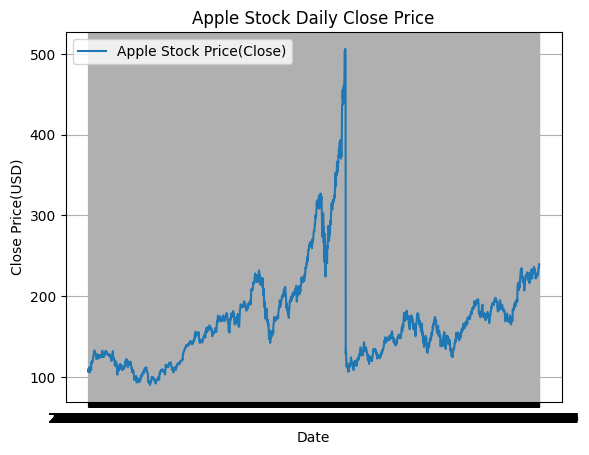

In [ ]:
## 꺾은선 그래프 그리기
plt.plot(df_AAPL.index, df_AAPL['close'], label = 'Apple Stock Price(Close)')
plt.xlabel('Date')
plt.ylabel('Close Price(USD)')
plt.title('Apple Stock Daily Close Price')
plt.legend()
plt.grid(True)

plt.show()

### Step 5. Add a new column "stock" to the dataframe and add the ticker symbol

--> 데이터프레임에 새로운 열 stock을 추가하고 이 열에 티커 심볼을 추가하라

In [92]:
df_AAPL['stock']='AAPL'

df_AAPL.head(5)

,open,high,low,close,volume,stock
2015-01-02,111.39,111.44,107.350,109.33,53204626,AAPL
2015-01-05,108.29,108.65,105.410,106.25,64285491,AAPL
2015-01-06,106.54,107.43,104.630,106.26,65797116,AAPL
2015-01-07,107.20,108.20,106.695,107.75,40105934,AAPL
2015-01-08,109.23,112.15,108.700,111.89,59364547,AAPL


### Step 6. Repeat the two previous steps for a few other stocks, always creating a new dataframe: Tesla, IBM and Microsoft. (Ticker symbols TSLA, IBM and MSFT.)

--> Tesla, IBM, MS 주식 데이터도 똑같이 반복. 항상 새로운 데이터프레임을 생성하고 각 주식의 티커 심볼 추가

In [93]:
api_key = 'DV8J848ACN9CMSGT'
start_date='2015-01-01'
end_date=datetime.today()

##Tesla
df_TSLA = web.DataReader('TSLA', 'av-daily', start=start_date, end=end_date, api_key=api_key)
df_TSLA['stock']='TSLA'

##IBM
df_IBM = web.DataReader('IBM', 'av-daily', start=start_date, end=end_date, api_key=api_key)
df_IBM['stock']='IBM'

##MS
df_MSFT = web.DataReader('MSFT', 'av-daily', start=start_date, end=end_date, api_key=api_key)
df_MSFT['stock']='MSFT'

df_TSLA.head()
df_IBM.head()
df_MSFT.head()

RemoteDataError:  Their was an issue from the data vendor side, here is their response: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}

### Step 7. Combine the four separate dataFrames into one combined dataFrame df that holds the information for all four stocks

In [94]:
##concat 함수 사용: 여러 데이터프레임을 행 방향으로 이어붙임. 리스트 형태로 데이터프레임을 넣으면 순서대로 연결

df = pd.concat([df_AAPL, df_TSLA, df_IBM, df_MSFT])

df


,open,high,low,close,volume,stock
2015-01-02,111.390,111.4400,107.350,109.33,53204626,AAPL
2015-01-05,108.290,108.6500,105.410,106.25,64285491,AAPL
2015-01-06,106.540,107.4300,104.630,106.26,65797116,AAPL
2015-01-07,107.200,108.2000,106.695,107.75,40105934,AAPL
2015-01-08,109.230,112.1500,108.700,111.89,59364547,AAPL
...,...,...,...,...,...,...
2024-11-25,418.380,421.0800,414.850,418.79,27691090,MSFT
2024-11-26,419.585,429.0414,418.850,427.99,23458889,MSFT
2024-11-27,425.105,427.2299,422.020,422.99,18332444,MSFT
2024-11-29,420.090,424.8800,417.800,423.46,16271921,MSFT


### Step 8. Shift the stock column into the index (making it a multi-level index consisting of the ticker symbol and the date).

--> stock 열을 데이터프레임의 인덱스로 이동시키고, 기존의 date 인덱스와 함께 다중 인덱스를 구성

In [95]:
df = df.set_index(['stock', df.index])
df.index.names = ['Ticker', 'Date']


df.head()


open    high      low   close    volume
Ticker Date                                                 
AAPL   2015-01-02  111.39  111.44  107.350  109.33  53204626
       2015-01-05  108.29  108.65  105.410  106.25  64285491
       2015-01-06  106.54  107.43  104.630  106.26  65797116
       2015-01-07  107.20  108.20  106.695  107.75  40105934
       2015-01-08  109.23  112.15  108.700  111.89  59364547

### Step 7. Create a dataFrame called vol, with the volume values.
--> volume 값만을 포함하는 새로운 데이터프레임 volume 생성

In [ ]:
volume = df[['volume']]

volume.head()

,,volume
Date,Ticker,
2015-01-02,AAPL,53204626
2015-01-05,AAPL,64285491
2015-01-06,AAPL,65797116
2015-01-07,AAPL,40105934
2015-01-08,AAPL,59364547


### Step 8. Aggregate the data of volume to weekly.
Hint: Be careful to not sum data from the same week of 2015 and other years.

--> 거래량 데이터를 주간 기준으로 집계

In [96]:
vol_weekly = volume.resample('W').sum()

vol_weekly.head()



ValueError: MultiIndex has no single backing array. Use 'MultiIndex.to_numpy()' to get a NumPy array of tuples.

### Step 9. Find all the volume traded in the year of 2015

In [ ]:
volume_2015 = volume_weekly.loc[2015]
# vol_2015 = vol[vol.index.year == 2015].sum()

volume_2015

,2015
year,2024
week,34
Ticker,TSLA
volume,381622057
